#Project Title
Analysis of Environemntal Citations in Baltimore Cit


#Domain
Environmental

#Objective
The objective of this project is to analyze environmental citations issued in Baltimore City using exploratory data analysis. The project focuses on data cleaning, visualization, and trend identification to uncover insights related to sanitation and public safety violations, ultimately providing actionable recommendations for improved environmental enforcement

#Outcome
The analysis revealed major environmental violation trends across Baltimore City, identified high-risk areas, and produced actionable insights through data cleaning and visualization to support improved environmental enforcement strategies

#Dataset Information
**Source**: https://data.baltimorecity.gov/datasets/baltimore::environmental-citations-1/explore , gov_dataset

**Year / Timeline:** Data collected during 2025 to 2026

**Dataset Column Description –** Environmental Citations (Baltimore City)

**Citation Number / Citation ID** – A unique identifier assigned to each environmental citation.

**Issue Date –** The date on which the environmental citation was issued.

**Violation Type / Violation Description** – Describes the nature of the violation, such as sanitation, health, safety, or quality-of-life issues.

**Department / Agency** – The city department responsible for issuing the citation.

**Location / Address** – The address or location where the violation occurred.

**Neighborhood / District / Borough –** Administrative area within Baltimore City where the citation was issued.

**Zip Code – **Postal code of the violation location.

**Status –** Current status of the citation (e.g., Open, Closed, Pending).

**Fine Amount / Penalty Amount** – Monetary fine associated with the citation, if applicable.

**Latitude & Longitude** – Geographic coordinates used for spatial analysis and mapping.

**Note For Kind of Analysis to be done**

 kinds of Dataset


Descriptive Analysis (summarizing the dataset)

Diagnostic Analysis (finding reasons behind patterns)

Predictive Analysis (optional if forecasting required using basic stats)

Prescriptive Analysis (recommendations for business decisions)

## **Stage1** - Problem Definition and Dataset Seletion



*  Define the business problem related to environmental citations and violations.
* Determine expected outcomes such as identifying trends and Common violations.
* Explain the Data set Source as an open goverment data platfrom
*   Initial EDA (Rows, colums duplicate)





In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/jothia008-blip/ECB-raw-project/2440994a21175fe88f2f1dccd301829f8a5c62f5/ECB%20(1).csv"
df= pd.read_csv(url)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().any()


# **Stage 2-**   **Data Cleaning and Pre-Processing**
* Missing values were checked in all columns and treated using appropriate methods such as removal or replacement.

* Duplicate records were identified and removed to avoid repeated analysis.

* Outliers were checked in numerical columns like fine amount, where extremely high values were observed.

* Skewness was found in fine amount data, showing more low values and few very high values.

* Data types were corrected to ensure accurate analysis and visualization.



In [ ]:
df . isnull().sum()

In [ ]:
cols_to_drop= ['LastPaidDate','HearingDate',"HearingRequestReceivedDate",'OfficerPresenceRequested','HearingStatus','HearTime','HashedRecord','NeedsSync','IsDeleted']

In [ ]:
df=df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
df.isnull()

In [ ]:
categorical_cols=['Description','Block','Lot','Neighborhood','PoliceDistrict','CouncilDistrict','Location']

for col in categorical_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()
df=df.drop_duplicates()

In [ ]:
date_cols=['ViolationDate','DueDate']

for col in date_cols:
  df[col]=pd.to_datetime(df[col],errors='coerce')

In [ ]:
df=df.dropna(subset=date_cols)

In [ ]:
num_cols=['FineAmount','Balance','TotalPaid','TotalAbated','TotalVoided']

for col in num_cols:
  df[col]=pd.to_numeric(df[col],errors='coerce')

df[num_cols]= df[num_cols].fillna(0)

In [ ]:
text_cols=['Agency','CitationStatus','ViolationLocation','Description',]

for col in text_cols:
  df[col]=df[col].str.strip().str.lower()

In [ ]:
df = df.rename(columns={
    'ViolationDate': 'violation_date',
    'FineAmount': 'fine_amount',
    'CitationStatus': 'citation_status'
})


In [ ]:
df.info()
df.isnull().sum()
df.duplicated().sum()

In [ ]:
df.head()

#  **Stage 3 - EDA and Visualizations**
* Check which violations happen most often.
* See how the number of citations changes over time.
* compare citations from different agenies and area.
* Look at fine amount, and balance amounts.
* Use simple charts to show patterns in the data .




# **CHART-1** Top violation types

 BAR CHART


In [ ]:
import matplotlib.pyplot as plt

top_violations = df['Description'].value_counts().head(10)

plt.figure()
top_violations.plot(kind='bar')
plt.bar(top_violations.index, top_violations.values,
        color=['red','orange','yellow','green','blue','purple','pink','teal','brown','gray'])
plt.show()

plt.title('Top 10 violtion Types')
plt.xlabel('Violation Type')
plt.ylabel('Number of citations')

plt.xticks(rotation=90)
plt.show()

# **Interpretation**

 Most citations are for a few violation types. These are the main environmental issues that occur repeatedly in Baltimore City.

# **Insights**

 Improper waste disposal is the most common violation, indicating poor waste management practices across the city


# **CHART-2 Citations Over Time(line chart)**

In [ ]:
df['violation_year']= pd.to_datetime(df['violation_date']).dt.year

yearly_counts = df['violation_year'].value_counts().sort_index()

plt.figure()
plt.plot(yearly_counts.index,yearly_counts.values)
plt.title('Citations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Citations')
plt.show()

# **Interpretation**

Citations have fluctuated over the years. This shows trends in enforcement and possibly changes in compliance or regulations.



# **Insight**
 Environmental citations show an overall increasing trend over time, indicating a rise in environmental violations or stricter enforcement in recent years.

# **CHART - 3 Citations by Agency (Bar Chart)**

In [ ]:
agency_counts = df ['Agency'].value_counts().head(10)

plt.figure()
agency_counts.plot(kind='bar')
plt.title('Top agencies by Citations')
plt.xlabel('Agency')
plt.ylabel('Number of Citatons')
plt.xticks(rotation=90)
plt.show()

# **Interpertation**

Some agencies issue more citations than others. This highlights which departments are more active in enforcement.




# **Insight**

One agency dominates the number of citations, while other agencies contribute fewer cases, showing uneven enforcement levels.

# **CHaRT-4 Fine amount distribution (Histogram)**

In [ ]:
plt.figure()
plt.hist(df['fine_amount'],bins=30,color='green',edgecolor='black')
plt.title('Fine Amount Distribution')
plt.xlabel('Fine Amount')
plt.ylabel('frequency')
plt.show()

# **Interpretation**
Most fines are in the lower range, while a few cases have very high fines. This helps understand the financial impact of citations.




# **Insight**

The histogram shows a right-skewed distribution, where most fine amounts are low, but a few violations receive very high fines.

# **CHART- 5 Citation Status distribution (Bar chart)**

In [ ]:
status_counts = df['citation_status'].value_counts()


plt.figure()
status_counts.plot(kind='bar')
plt.bar(top_violations.index, top_violations.values,
        color=['red','orange','yellow','green','blue','purple','pink','teal','brown','gray'])
plt.show()
plt.title('Citation Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Intrepertation**

The chart shows how many citations are open, closed, or resolved. Most citations are already resolved or closed.





# **Insight**
The bar chart shows that most citations are in an open status, indicating delays in compliance or fine settlement by violators.

In [ ]:
df.columns

# **CHART-6 citstions by neighborhood top 10 (bar chart)**

In [ ]:
neigh_counts = df['Neighborhood'].value_counts().head(10)

plt.figure()
neigh_counts.plot(kind='bar')
plt.title('Top 10 Neighborhoods by Citations')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Citations')
plt.xticks(rotation=90)
plt.show()


# **Interpretation**

Certain neighborhoods receive more citations than others, indicating areas with recurring environmental issues.



# **Insights**

Some neighborhoods have more citations than others, showing problem areas that need more attention.

# **CHART-7 Citation by police district (bar chart)**

In [ ]:
police_counts = df['PoliceDistrict'].value_counts()

plt.figure()
police_counts.plot(kind='bar')
plt.title('Citations by Police District')
plt.xlabel('Police District')
plt.ylabel('Number of Citations')
plt.xticks(rotation=45)
plt.show()


# **Interpertation**

Some police districts issue more citations than others. This reflects enforcement activity and possible high-violation areas.



# **Insight**
Some police districts have more citations, showing higher environmental issues in those areas.

# **CHART-8 Fine amount vs citation ststus (box plot)**

In [ ]:
import seaborn as sns

In [ ]:
plt.figure()
sns.boxplot(x='citation_status', y='fine_amount', data=df)
plt.title('Fine Amount vs Citation Status')
plt.xticks(rotation=45)
plt.show()


# **Interpertation**

The distribution of fine amounts varies with citation status. Closed citations often have lower fines, while open citations sometimes have higher fines.




# **Insights**
The box plot shows that open citations have a wider range and higher outlier fine amounts compared to closed citations, indicating that unpaid or unresolved cases often involve higher penalties.

# **CHART-9 Total paid vs balance (Scatter plot)**

In [ ]:
avg_fine = df.groupby('Agency')['fine_amount'].mean().sort_values(ascending=False).head(10)

plt.figure()
avg_fine.plot(kind='bar')
plt.title('Average Fine Amount by Agency')
plt.xlabel('Agency')
plt.ylabel('Average Fine')
plt.xticks(rotation=90)
plt.show()






# **Interpertation**

Most citations are fully paid (Balance = 0). A few cases have high balances, showing partial or unpaid fines.

# **Insight**
The scatter plot shows that many citations have low total payments with higher remaining balances, indicating incomplete or delayed fine payments.




#  CHART -10 Agency vs average fine amount (scatter plot)

In [ ]:
# Calculate average fine per agency
avg_fine = df.groupby('Agency')['fine_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.scatter(avg_fine.index, avg_fine.values, color='blue')
plt.title('Average Fine Amount by Agency')
plt.xlabel('Agency')
plt.ylabel('Average Fine Amount')
plt.xticks(rotation=90)
plt.show()


# **Interpertation**

Some agencies issue higher fines on average than others. This shows differences in enforcement and penalty severity between agencies.

# **Insight**
Some agencies issue higher average fines, showing stricter enforcement or more serious violations.

# **Stage 4 – Documentation, Insights and Presentation**

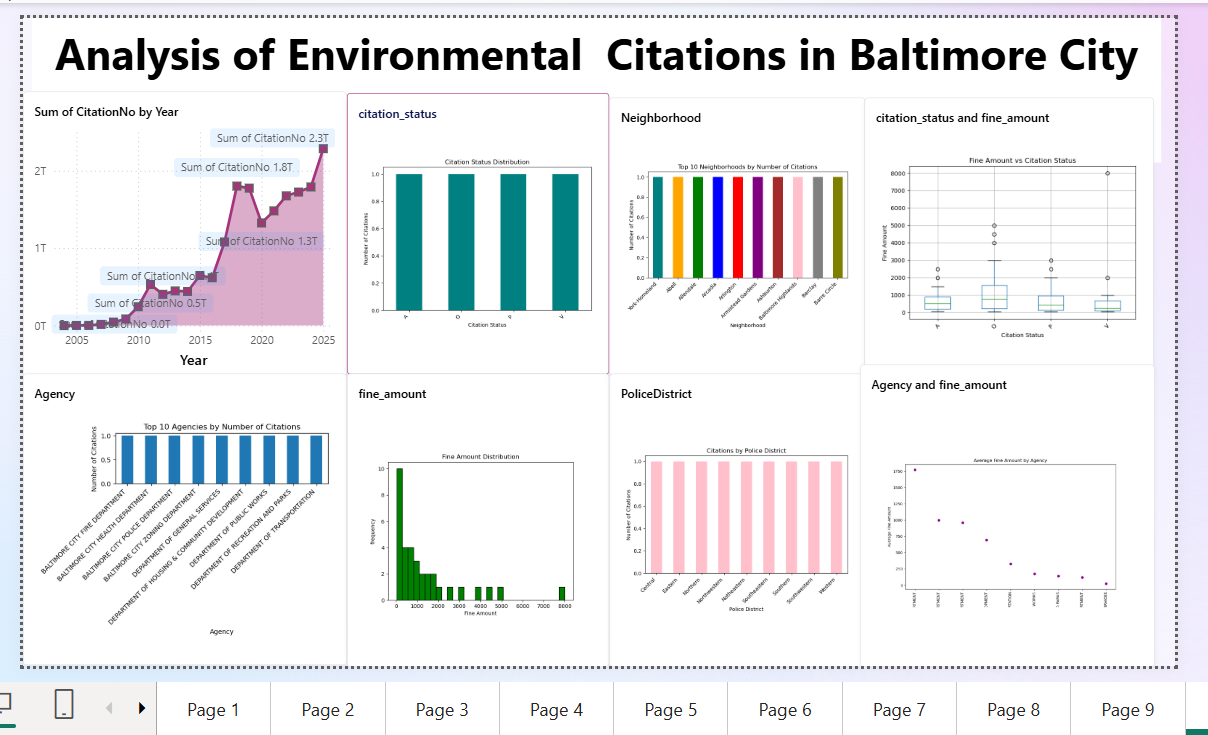

# **PROJECT INSIGHTS**
*  Identify the most frequent violation types
*  Found areas and police districts with highest citations
* Observed uneven distribution of violations across locations
* Noted variation in fine amounts based on violation severity.
* Detected outlires with very high fine amount .
* Compared paid, unpaid, and dismissed citation status .
* Found relationship between total fine and balance amount.
* Analyzed agency_wise avaerage fine differences.
* Used visual charts to support data-drven insights .


# DOCUMENTATION

**Dataset**:  Environmental Citations Dataset

**Domain**: Environmental Compliance

**Tools Used:** Python, Pandas, Matplotlib

**Process Followed:**

* Data collection and loading

* Data cleaning and preprocessing

* Exploratory data analysis

* Visualization and insight generation

* Final analysis and conclusion


# CONCLUSION

This project analyzed environmental citation data to identify major violation types, trends, and risk areas. The insights help authorities understand problem areas and take preventive actions to improve environmental compliance.
